# Cars4U Market Analysis on Second hand cars

## Context

In recent years, the second hand cars are having more demand compared to new cars in the Indian market. The aim of this analysis is to predict the price of a second hand car by analysing the dataset provided and come up with a pricing model based on the market value.

## Data Dictionary

__S.No.__- Serial number<br>
__Name__- Name of the car which includes brand name and model name<br>
__Location__- Location in which the car is being sold or is available for purchase (cities)<br>
__Year__- Manufacturing year of the car<br>
__Kilometers_driven__- The total kilometres driven in the car by the previous owner(s) in km<br>
__Fuel_Type__- The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)<br>
__Transmission__- The type of transmission used by the car (Automatic/Manual)<br>
__Owner__- Type of ownership<br>
__Mileage__- The standard mileage offered by the car company in kmpl or km/kg<br>
__Engine__- The displacement volume of the engine in CC<br>
__Power__- The maximum power of the engine in bhp<br>
__Seats__- The number of seats in the car<br>
__New_Price__- The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)<br>
__Price__- The price of the used car in INR Lakhs<br>

### Importing Libraries

In [222]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.linear_model import LinearRegression     
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

# Removes the limit from the number of displayed columns and rows.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

### Loading and Exploring the data

In [223]:
df = pd.read_csv("used_cars_data.csv") # function to read the csv file
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1])) # prints the number of rows and columns of dataset

# using random to display random rows rather than only first 5 and last 5
np.random.seed(1)
df.sample(n=10)

The dataset has 7253 rows and 14 columns


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


Looking at the above random rows we can drop the S.No column as it is the same as the row number. We can use the row number here so we will be dropping this column. Dropping name of the car as it will not be used in the analysis.

The Mileage, Engine, Power and New_Price columns are supposed to be numeric. The units are provided in the columns hence it is in string format. We will have to clean these columns and make necessary conversions.

The preview shows that New_price has lot of missing values.

In [224]:
df.drop(['S.No.','Name'],axis=1,inplace=True) # dropping unneccesary columns

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   object 
 7   Engine             7207 non-null   object 
 8   Power              7078 non-null   object 
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


In [226]:
df.isnull().sum().sort_values(ascending=False) # check for null values in the dataset

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

We can see that the New_Price column has major missing values. There is no particular pattern in missing values.

## Processing columns:

Mileage, Engine, Power and New_Price are the columns that should be numeric but are object type. These have to be processed.

#### Processing Mileage column

Mileage column contains two units that are kmpl and km/kg. These units are given as per the fuel being used. Basically it defines the distance covered per unit of fuel, so no conversion is required and we can just remove the unit.

In [227]:
def process_mileage(mileage_val):
    if isinstance(mileage_val, str):  # checks if mileage value is a string
        # remove units
        if mileage_val.endswith('km/kg'):
            return float(mileage_val.replace('km/kg',''))
        elif mileage_val.endswith('kmpl'):
            return float(mileage_val.replace('kmpl',''))
    else:  # this happens when the current mileage is NaN
        return np.nan
    
df['Mileage'] = df['Mileage'].apply(process_mileage)

df['Mileage'].head()

0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64

#### Process Engine Column

The engine column has the unit CC which has to be removed to convert this into a numeric column.

In [228]:
def process_engine(engine_val):
    if isinstance(engine_val, str):  # checks if engine value is a string
        # remove unit
        if engine_val.endswith('CC'):
            return float(engine_val.replace('CC',''))
        else:
            return engine_val
    else:  # this happens when the current engine value is NaN
        return np.nan
    
df['Engine'] = df['Engine'].apply(process_engine)

df['Engine'].head()

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine, dtype: float64

#### Processing power column

The power column contains the unit bhp in the data which has to be removed to convert it to numeric column

In [229]:
def process_power(power_val):
    if isinstance(power_val, str):  # checks if power value is a string
        # remove the unit
        if power_val.endswith('bhp'):
            return float(power_val.replace('bhp',''))
        else:
            return power_val
    else:  # this happens when the current power value is nan
        return np.nan
    
df['Power'] = df['Power'].apply(process_power)

df['Power'].head()

0     58.16
1    126.20
2     88.70
3     88.76
4    140.80
Name: Power, dtype: float64

#### Processing New_Price column:

The New_Price column contains data in INR, which is provided in lakhs where 1 Lakh = 1 Million. In some places it is provided in crores where 1 crore = 100 lakh. This has to be converted to lakh. Let us remove the units from the column and convert it into a numeric column in terms of lakh. 

In [230]:
def process_new_price(new_price_val):
    if isinstance(new_price_val, str):  # checks if new_price is a string
        if new_price_val.strip().endswith('Lakh'):
            new_price_val = new_price_val.replace('Lakh','').strip()
            if '.' not in new_price_val: # add thousands place if it is not present to standardize
                new_price_val = new_price_val + '.00'
            else:
                price_list = new_price_val.split('.')
                if len(price_list[1]) == 1: # check if thousands place have only single digit and add 0 if it is singe digit
                    new_price_val = new_price_val + '0'
            return float(new_price_val.replace('.',''))*1000 # standardize display
        elif new_price_val.strip().endswith('Cr'):
            new_price_val = new_price_val.replace('Cr','').strip()
            if '.' not in new_price_val: # add lakhs place if it is not present to standardize
                new_price_val = new_price_val + '.00'
            else:
                price_list = new_price_val.split('.')
                if len(price_list[1]) == 1: # check if lakhs place have only single digit and add 0 if it is singe digit
                    new_price_val = new_price_val + '0'
            return float(new_price_val.replace('.',''))*100000 # convert crore into lakh
        else:
            return new_price_val
    else:  # this happens when the current income is np.nan
        return np.nan
    
df['New_Price'] = df['New_Price'].apply(process_new_price)

df['New_Price'].head()

0         NaN
1         NaN
2    861000.0
3         NaN
4         NaN
Name: New_Price, dtype: float64

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 680.1+ KB


## Basic summary statistics and consequences:

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2.013365e+03,3.254421e+00,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,5.869906e+04,8.442772e+04,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,1.814158e+01,4.562197e+00,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1.616573e+03,5.952851e+02,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,1.127652e+02,5.349355e+01,34.20,75.00,94.00,138.10,616.00
Seats,7200.0,5.279722e+00,8.116597e-01,0.00,5.00,5.00,5.00,10.00
New_Price,1006.0,2.277969e+06,2.775934e+06,391000.00,788500.00,1157000.00,2604250.00,37500000.00
Price,6019.0,9.479468e+00,1.118792e+01,0.44,3.50,5.64,9.95,160.00


### Check the value counts of non numeric columns:

In [233]:
# looking at value counts for non-numeric features

num_to_display = 10 # making number of values to be displayed as dynamic
for colname in df.dtypes[df.dtypes == 'object'].index:
    print("Displaying details of {} column\n".format(colname))
    val_counts = df[colname].value_counts(dropna=False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print('\nOnly displaying first {} of {} values.'.format(num_to_display,len(val_counts)))
    print('\n\n')

Displaying details of Location column

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64

Only displaying first 10 of 11 values.



Displaying details of Fuel_Type column

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Displaying details of Transmission column

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



Displaying details of Owner_Type column

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64





## Univariate Analysis:

Let us create a distribution plot for the numerical variables.

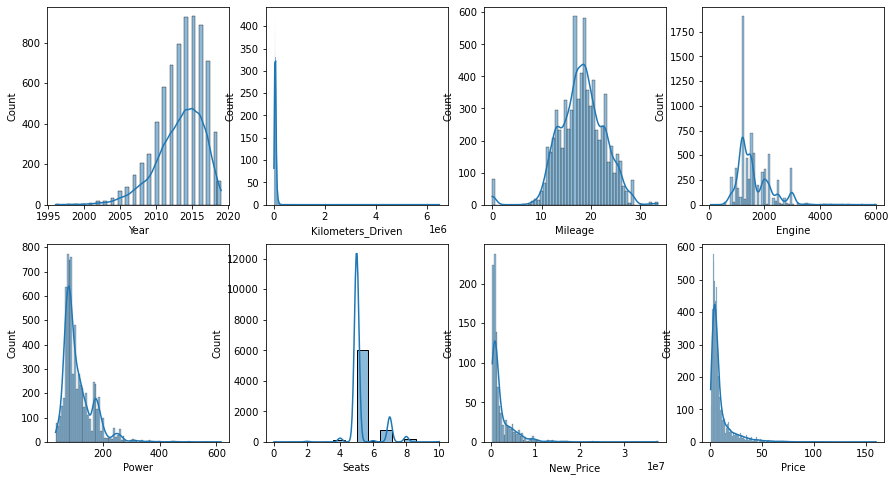

In [234]:
columns = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','New_Price','Price'] # list of numerical values in the dataset
plt.figure(figsize=(15,8)) # specify the size of each plot

for i, variable in enumerate(columns):
    plt.subplot(2,4,i+1)
    sns.histplot(df[variable], kde=True) # create hitogram with kde for all the numerical variables

plt.show()

From the above graph we can see that year,mileage and seats are left skewed. Kilometers_driven, engine, power, new_price and price are right skewed.

## Bivariate Analysis:

Here we will be using a pairplot to get the relation between different variables so that we can do further analysis.

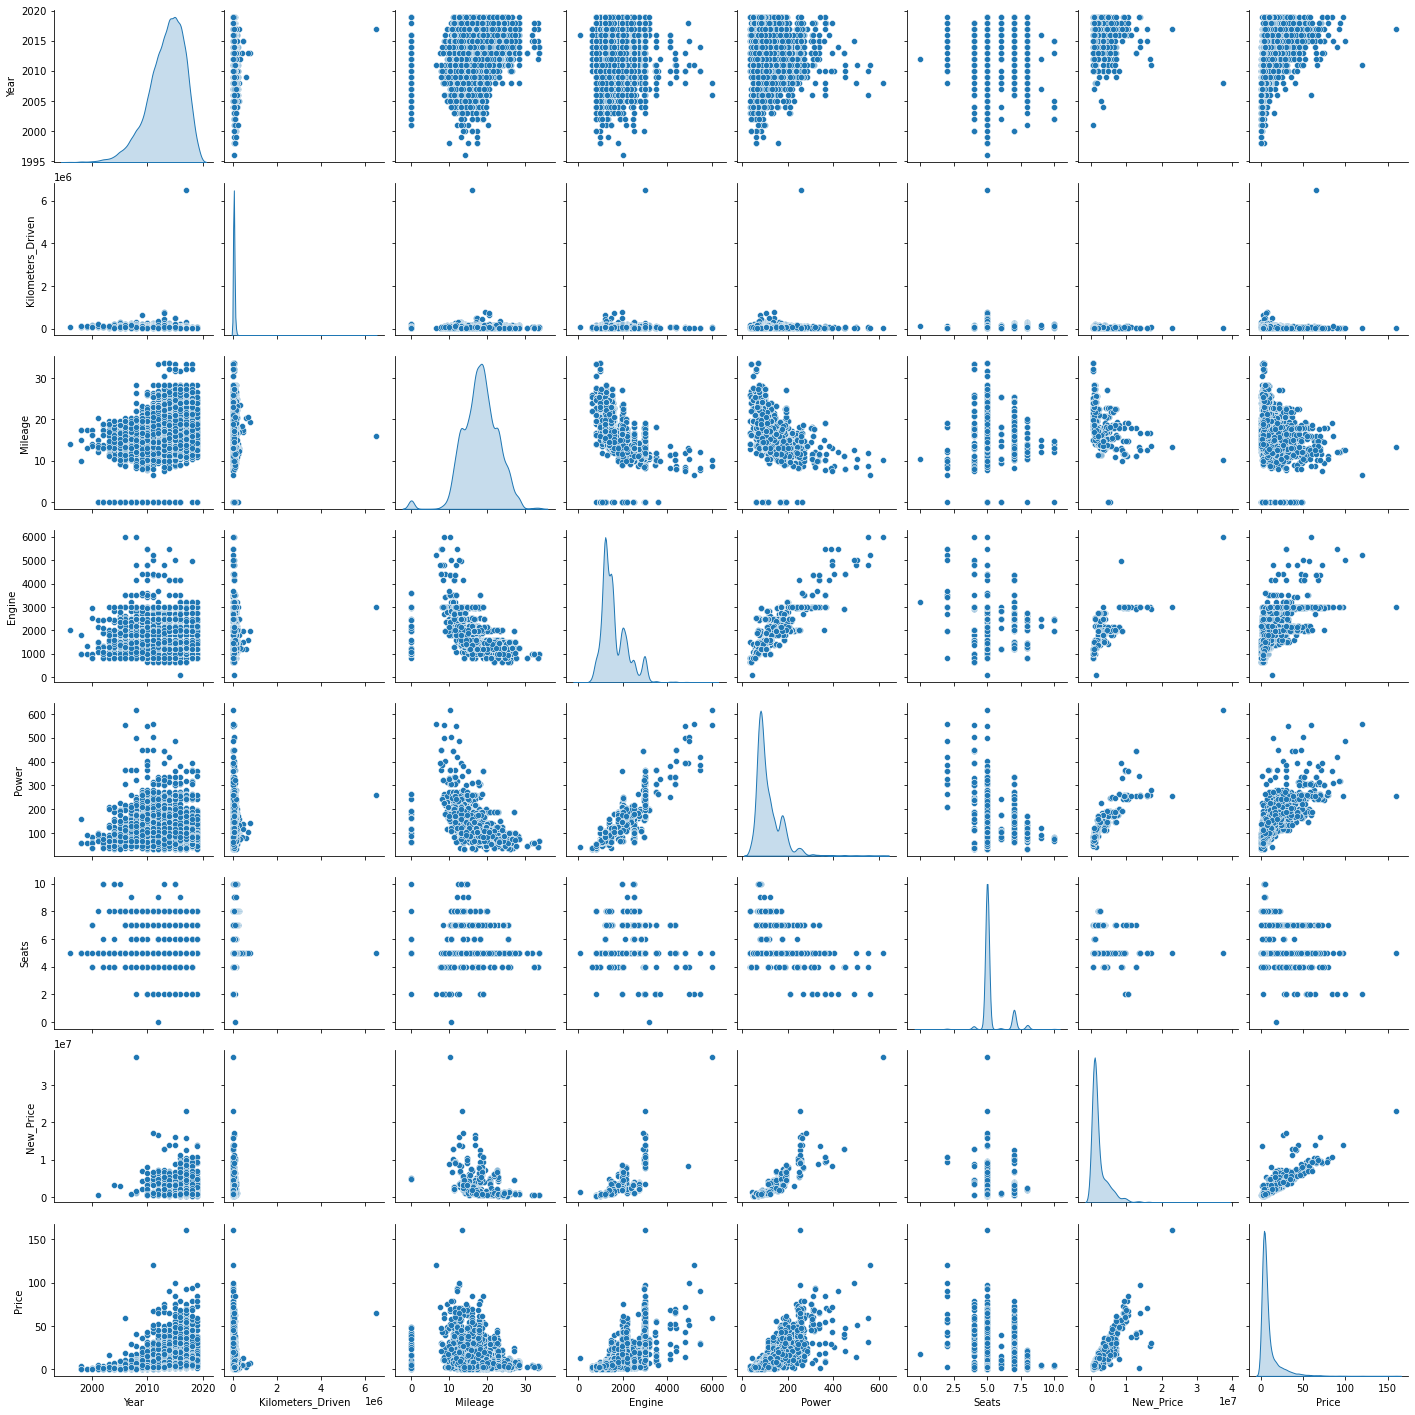

In [235]:
sns.pairplot(data=df,diag_kind='kde'); # creating apirplot so that we can see variable relationships in single frame

By looking at the above graph we can see that the price of used cars have positive correlation with year of built and New_Price attributes. We can even see somesortoflinear relationship with mileage, engine and power.  

## Splitting Categorical Variables:

#### Making categoricals into category:

In [236]:
cat_vars = ['Location', 'Fuel_Type', 'Transmission','Owner_Type'] # convert categorical variables to type category

for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7251 non-null   float64 
 7   Engine             7207 non-null   float64 
 8   Power              7078 non-null   float64 
 9   Seats              7200 non-null   float64 
 10  New_Price          1006 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(4), float64(6), int64(2)
memory usage: 482.7 KB


#### Split categorical variables

In [237]:
df = pd.get_dummies(df, columns=['Location', 'Fuel_Type', 'Transmission','Owner_Type'], drop_first=True)
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,NaN,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,NaN,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,861000.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,NaN,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,NaN,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Missing Value Treatment

Let us first check for the number of missing values

In [238]:
df.isnull().sum().sort_values(ascending=False)

New_Price                    6247
Price                        1234
Power                         175
Seats                          53
Engine                         46
Mileage                         2
Year                            0
Location_Mumbai                 0
Owner_Type_Second               0
Owner_Type_Fourth & Above       0
Transmission_Manual             0
Fuel_Type_Petrol                0
Fuel_Type_LPG                   0
Fuel_Type_Electric              0
Fuel_Type_Diesel                0
Location_Pune                   0
Location_Jaipur                 0
Location_Kolkata                0
Location_Kochi                  0
Kilometers_Driven               0
Location_Hyderabad              0
Location_Delhi                  0
Location_Coimbatore             0
Location_Chennai                0
Location_Bangalore              0
Owner_Type_Third                0
dtype: int64

 - We can see that most of the columns do not have missing values. <br>
 - The price column have a lot of missing values. <br>
 - Some of the rows in the price column are missing. Since we need the data for this column for further analysis let us remove the rows where data is missing for price. <br>

In [239]:
df = df.dropna(subset=['Price'], how='all') # drop rows where price is missing
df.shape

(6019, 26)

In [240]:
df.isnull().sum().sort_values(ascending=False)

New_Price                    5195
Power                         143
Seats                          42
Engine                         36
Mileage                         2
Year                            0
Location_Mumbai                 0
Owner_Type_Second               0
Owner_Type_Fourth & Above       0
Transmission_Manual             0
Fuel_Type_Petrol                0
Fuel_Type_LPG                   0
Fuel_Type_Electric              0
Fuel_Type_Diesel                0
Location_Pune                   0
Location_Jaipur                 0
Location_Kolkata                0
Location_Kochi                  0
Kilometers_Driven               0
Location_Hyderabad              0
Location_Delhi                  0
Location_Coimbatore             0
Location_Chennai                0
Location_Bangalore              0
Price                           0
Owner_Type_Third                0
dtype: int64

In [241]:
# impute mileage with mean
print('Null values in Mileage before imputing : {}'.format(df['Mileage'].isnull().sum()))
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
print('Null values in Mileage after imputing : {}'.format(df['Mileage'].isnull().sum()))

Null values in Mileage before imputing : 2
Null values in Mileage after imputing : 0


In [242]:
# impute seats with median
print('Null values in Seats before imputing : {}'.format(df['Seats'].isnull().sum()))
df['Seats'].fillna(df['Seats'].median(), inplace=True)
print('Null values in Seats after imputing : {}'.format(df['Seats'].isnull().sum()))

Null values in Seats before imputing : 42
Null values in Seats after imputing : 0


In [243]:
# impute Engine with median
print('Null values in Engine before imputing : {}'.format(df['Engine'].isnull().sum()))
df['Engine'].fillna(df['Engine'].median(), inplace=True)
print('Null values in Engine after imputing : {}'.format(df['Engine'].isnull().sum()))

Null values in Engine before imputing : 36
Null values in Engine after imputing : 0


In [244]:
# impute power with median
print('Null values in Power before imputing : {}'.format(df['Power'].isnull().sum()))
df['Power'].fillna(df['Power'].median(), inplace=True)
print('Null values in Power after imputing : {}'.format(df['Power'].isnull().sum()))

Null values in Power before imputing : 143
Null values in Power after imputing : 0


In [245]:
#impute New_Price
print('Null values in New Price before imputing : {}'.format(df['New_Price'].isnull().sum()))
df['New_Price'].fillna(df['New_Price'].median(), inplace=True)
print('Null values in New Price before imputing : {}'.format(df['New_Price'].isnull().sum()))

Null values in New Price before imputing : 5195
Null values in New Price before imputing : 0


In [246]:
df['New_Price']

0       1167000.0
1       1167000.0
2        861000.0
3       1167000.0
4       1167000.0
          ...    
6014     788000.0
6015    1167000.0
6016    1167000.0
6017    1167000.0
6018    1167000.0
Name: New_Price, Length: 6019, dtype: float64

#### New_price column has a lot of missing values. By doing deeper analysis and research these values can be filled based on the car type

## Outlier detection and treatment

### Outlier detection using boxplot:

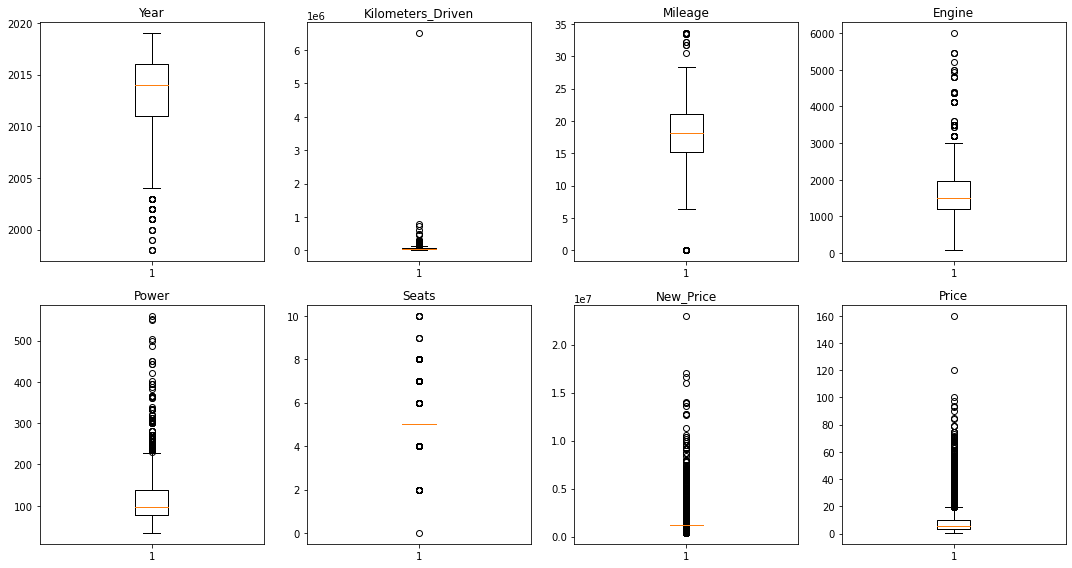

In [247]:
columns = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','New_Price','Price'] # list of numerical values in the dataset
plt.figure(figsize=(15,8)) # specify the size of each plot

for i, variable in enumerate(columns):
    plt.subplot(2,4, i + 1) # specify where to place each plot
    plt.boxplot(df[variable], whis=1.5) # create boxplot
    plt.tight_layout() # used to adjust the subplots
    plt.title(variable) # set the title to be the column name of that particular plot

plt.show()

 - From the bar graphs we can see that there are outliers in all the numerical attributes.<br>
 - The outlier is that mileage does not look normal as there are no vehicles with 0 mileage. Let us treat this column.<br>
 - The outliers in other columns are fine, as there are few high end vehicles having higher engine, power and mileage. There are vehicles which were manufactured before 2000. Price varies based on features. <br>

#### Calculate the outliers in each column:

In [248]:
Q1 = df[columns].quantile(0.25) # first quantile -> 25% percentile
Q3 = df[columns].quantile(0.75) # second quantile -> 75% percentile

IQR = Q3 - Q1 # Inter quantile range                  

lower_whisker = Q1 - 1.5*IQR # finding the lower bound   
upper_whisker = Q3 + 1.5*IQR # finding the upper bound

# find the percentage of outliers in each column
((df[columns] < lower_whisker) | (df[columns] > upper_whisker)).sum()/df.shape[0]*100 

Year                  0.830703
Kilometers_Driven     3.356039
Mileage               1.362353
Engine                1.013457
Power                 3.970759
Seats                15.999335
New_Price            13.606911
Price                11.928892
dtype: float64

#### Let us treat the outliers in Mileage column

In [249]:
Q1 = df['Mileage'].quantile(0.25)  # first quantile -> 25% percentile of column miles
Q3 = df['Mileage'].quantile(0.75)  # second quantile -> 75% percentile of column miles
IQR = Q3 - Q1 # Inter quantile range       
lower_whisker = Q1 - 1.5 * IQR # finding the lower bound   
upper_whisker = Q3 + 1.5 * IQR  # finding the upper bound

# replacing the outliers with lower bound if it is less than lower bound or with upper bound if it is greater than upper bound
df['Mileage'] = np.clip(df['Mileage'], lower_whisker, upper_whisker)

In [250]:
df['Mileage']=df['Mileage'].astype(int)
df['Mileage']

0       26
1       19
2       18
3       20
4       15
        ..
6014    28
6015    24
6016    14
6017    18
6018    25
Name: Mileage, Length: 6019, dtype: int32

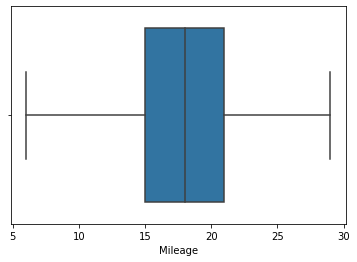

In [251]:
sns.boxplot(data=df, x='Mileage');

## Apply Linear Model

#### Split Data

In [252]:
# lets build our linear model
# independant variables
X = df.drop(['Price'], axis=1)
# the dependent variable
Y = df[['Price']]

In [253]:
# Split X and Y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

#### Fit Linear Model

In [254]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

#### Coefficients of each variable

In [255]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Year is 0.8353995097056017
The coefficient for Kilometers_Driven is -2.848636152459343e-05
The coefficient for Mileage is -0.2505906465898333
The coefficient for Engine is 0.001523872408405521
The coefficient for Power is 0.10175028337747671
The coefficient for Seats is -1.0480840591924707
The coefficient for New_Price is 2.076106233498132e-06
The coefficient for Location_Bangalore is 2.3760293646298423
The coefficient for Location_Chennai is 1.33157219627894
The coefficient for Location_Coimbatore is 2.4357947632039374
The coefficient for Location_Delhi is 0.26778074034047283
The coefficient for Location_Hyderabad is 2.3709373185926848
The coefficient for Location_Jaipur is 1.375512565568761
The coefficient for Location_Kochi is -0.0837675652444459
The coefficient for Location_Kolkata is -1.0442218889212063
The coefficient for Location_Mumbai is -0.730235135642871
The coefficient for Location_Pune is 0.9792764644957844
The coefficient for Fuel_Type_Diesel is -1.041

In [256]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1674.6667404361262


#### Regression for sample ( The score (R^2))

In [257]:
regression_model.score(X_train, y_train) # regression for input sample

0.7329918801450566

In [258]:
regression_model.score(X_test, y_test) # regression for output sample

0.5501442316936134

#### Adding Interaction variables

In [259]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.8902416977656008


In [260]:
#Out off sample (testing) R^2 is negetive which means as independent variable increases dependant variable decreases
print(poly_clf.score(X_test2, y_test))

-1.260453291767233


In [261]:
# this improves as the cost of 301 extra variables!
print(X_train.shape)
print(X_train2.shape)

(4213, 25)
(4213, 326)


### Since majority of the values were missing in new_price column, let us remove it and check if the model improves

In [262]:
# lets build our linear model
# independant variables
X = df.drop(['Price','New_Price'], axis=1)
# the dependent variable
Y = df[['Price']]

In [263]:
# Split X and Y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

#### Fit linear Model

In [264]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [265]:
# Coefficients of each variable
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Year is 0.874937340072185
The coefficient for Kilometers_Driven is -2.9709769590913487e-05
The coefficient for Mileage is -0.22630691659275715
The coefficient for Engine is 0.0005724563037596867
The coefficient for Power is 0.1262094975592139
The coefficient for Seats is -0.9307173910477282
The coefficient for Location_Bangalore is 2.277538324536891
The coefficient for Location_Chennai is 1.2709910908607915
The coefficient for Location_Coimbatore is 2.44336941913749
The coefficient for Location_Delhi is 0.09664597762742856
The coefficient for Location_Hyderabad is 2.524105821074363
The coefficient for Location_Jaipur is 1.4026238278785685
The coefficient for Location_Kochi is 0.04001240188276048
The coefficient for Location_Kolkata is -1.1305168592213475
The coefficient for Location_Mumbai is -0.6013597239576475
The coefficient for Location_Pune is 0.9616489944554436
The coefficient for Fuel_Type_Diesel is -0.8978822347417348
The coefficient for Fuel_Type_Electric i

In [266]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1753.685294829019


#### Regression for sample ( The score (R^2))

In [267]:
regression_model.score(X_train, y_train) # regression for input sample

0.6957454558042542

In [268]:
regression_model.score(X_test, y_test) # regression for output sample

0.5205938195247585

### Let us try converting Seats column into categorical variable to check if the performance improves

In [269]:
df["Seats"] = df["Seats"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       6019 non-null   int64   
 1   Kilometers_Driven          6019 non-null   int64   
 2   Mileage                    6019 non-null   int32   
 3   Engine                     6019 non-null   float64 
 4   Power                      6019 non-null   float64 
 5   Seats                      6019 non-null   category
 6   New_Price                  6019 non-null   float64 
 7   Price                      6019 non-null   float64 
 8   Location_Bangalore         6019 non-null   uint8   
 9   Location_Chennai           6019 non-null   uint8   
 10  Location_Coimbatore        6019 non-null   uint8   
 11  Location_Delhi             6019 non-null   uint8   
 12  Location_Hyderabad         6019 non-null   uint8   
 13  Location_Jaipur            6019 n

In [270]:
df = pd.get_dummies(df, columns=['Seats'], drop_first=True)
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,2010,72000,26,998.0,58.16,1167000.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,19,1582.0,126.20,1167000.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,2011,46000,18,1199.0,88.70,861000.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,2012,87000,20,1248.0,88.76,1167000.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,2013,40670,15,1968.0,140.80,1167000.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


#### Let us fit the data for the above dataset

In [271]:
# lets build our linear model
# independant variables
X = df.drop(['Price'], axis=1)
# the dependent variable
Y = df[['Price']]

In [272]:
# Split X and Y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

#### Fit Linear model

In [273]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [196]:
# Coefficients of each variable
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Year is 0.8308309183445214
The coefficient for Kilometers_Driven is -2.7465264759016464e-05
The coefficient for Mileage is -0.2701563758390479
The coefficient for Engine is 0.0006354694320746428
The coefficient for Power is 0.10235246629327482
The coefficient for New_Price is 2.0605354994589006e-06
The coefficient for Location_Bangalore is 2.3253348736760953
The coefficient for Location_Chennai is 1.362634480151616
The coefficient for Location_Coimbatore is 2.427810614186371
The coefficient for Location_Delhi is 0.2399486269101172
The coefficient for Location_Hyderabad is 2.3054647632945224
The coefficient for Location_Jaipur is 1.32689668243459
The coefficient for Location_Kochi is -0.06254821028525512
The coefficient for Location_Kolkata is -1.0376006728659994
The coefficient for Location_Mumbai is -0.6405739550781947
The coefficient for Location_Pune is 0.9322328313918686
The coefficient for Fuel_Type_Diesel is -0.5684581034552098
The coefficient for Fuel_Type_El

In [274]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1660.6965638671848


#### Regression for sample ( The score (R^2))

In [275]:
regression_model.score(X_train, y_train) # regression for input sample

0.7400435148222082

In [276]:
regression_model.score(X_test, y_test) # regression for output sample

0.5703508997668584

## Observations

 - The performance of the model has reduced in the initial model (where seats is considered as numerical attribute and New_price is present).<br>
 - After adding Polynomial Features, the performance have increased but at the cost of addition of 301 new features.<br>
 - Considering that the decrease in performance of the first model could be because the majority of values are missing in the New_Price feature, a new model was built. Here the performance of train data itself is less. But the difference in performance between train and test have reduced.<br>
 - The third model where we converted seats into categorical variable, the performance on train data have improved compared to second model, but performance on test remains somewhere near to the other two models.<br>


